In [1]:
import numpy as np
import matplotlib.pyplot as plt


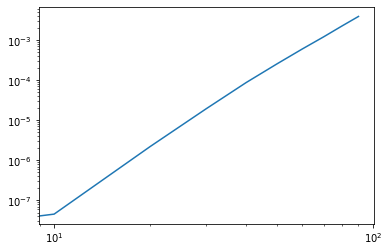

In [6]:
L, out = np.loadtxt('lowLN2_out.txt')
plt.loglog(L, out)